In [6]:
import pandas as pd
data= pd.read_excel("Online Retail.xlsx")
data.shape

(541909, 8)

In [7]:
country_counts = data['Country'].value_counts()

# count of each unique value
print("Country Counts:")
print(country_counts)

Country Counts:
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                    

# Elbow Method Graph

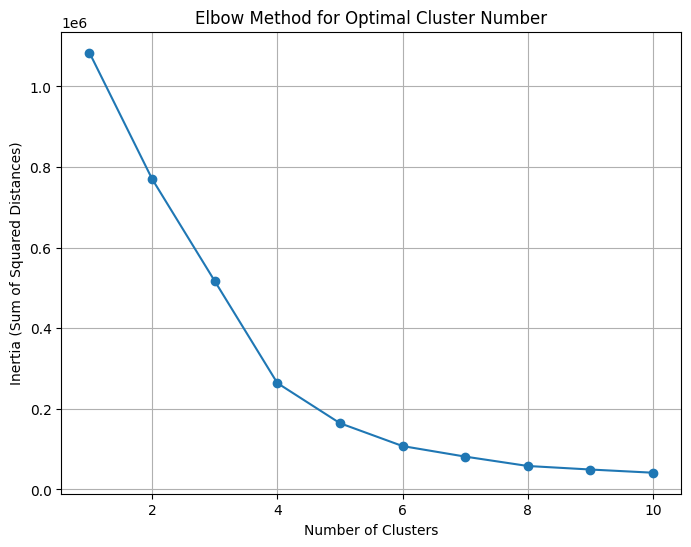

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading dataset
data = pd.read_excel('Online Retail.xlsx')  

# Selecting the features
X = data[['Quantity', 'UnitPrice']]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


cluster_range = range(1, 11)  

inertia = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.grid(True)
plt.show()

# K-Means Clustering

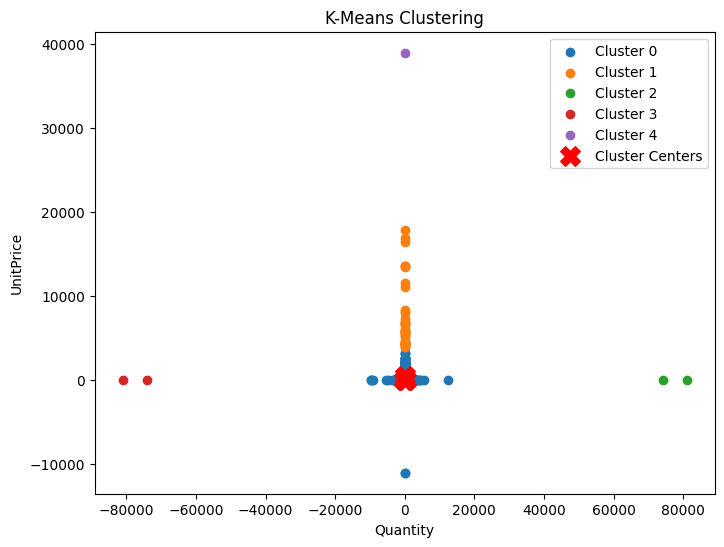

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Loading the Datsaset
data = pd.read_excel('Online Retail.xlsx')  

# Selecting the features 
X = data[['Quantity', 'UnitPrice']]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Specifying the number of clusters by seeing the Elbow Method Graph
num_clusters = 5  

# Applying K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0,n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Quantity'], cluster_data['UnitPrice'], label=f'Cluster {cluster}')

# Ploting the cluster centers
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Cluster Centers', marker='X')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Function to identify the cluster for a given data point

In [11]:

def identify_cluster(user_data_point):
    user_data_scaled = scaler.transform(user_data_point)
    user_cluster = kmeans.predict(user_data_scaled)[0]
    return user_cluster


user_data_point = pd.DataFrame({'Quantity': [6], 'UnitPrice': [3.39]})  # Replace with user's data
user_cluster = identify_cluster(user_data_point)

# Printing the identified cluster and why
cluster_characteristics = data.groupby('Cluster').mean("numeric_only")
reason = f"The provided data point belongs to Cluster {user_cluster} because it is closest to the cluster center with characteristics:\n{cluster_characteristics.loc[user_cluster]}"
print(reason)

The provided data point belongs to Cluster 0 because it is closest to the cluster center with characteristics:
Quantity          9.553130
UnitPrice         3.959810
CustomerID    15287.721824
Name: 0, dtype: float64
